<a href="https://colab.research.google.com/github/omar-nazzal/Prediction-of-Product-Sales/blob/main/project_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [100]:
df.info()
# 2) What are the datatypes of each variable?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1-they have 8523 rows and 12 colum

## Data Cleaning

In [101]:
# 3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()


0

In [102]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [103]:
df.nunique() / len(df) * 100




Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [104]:
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

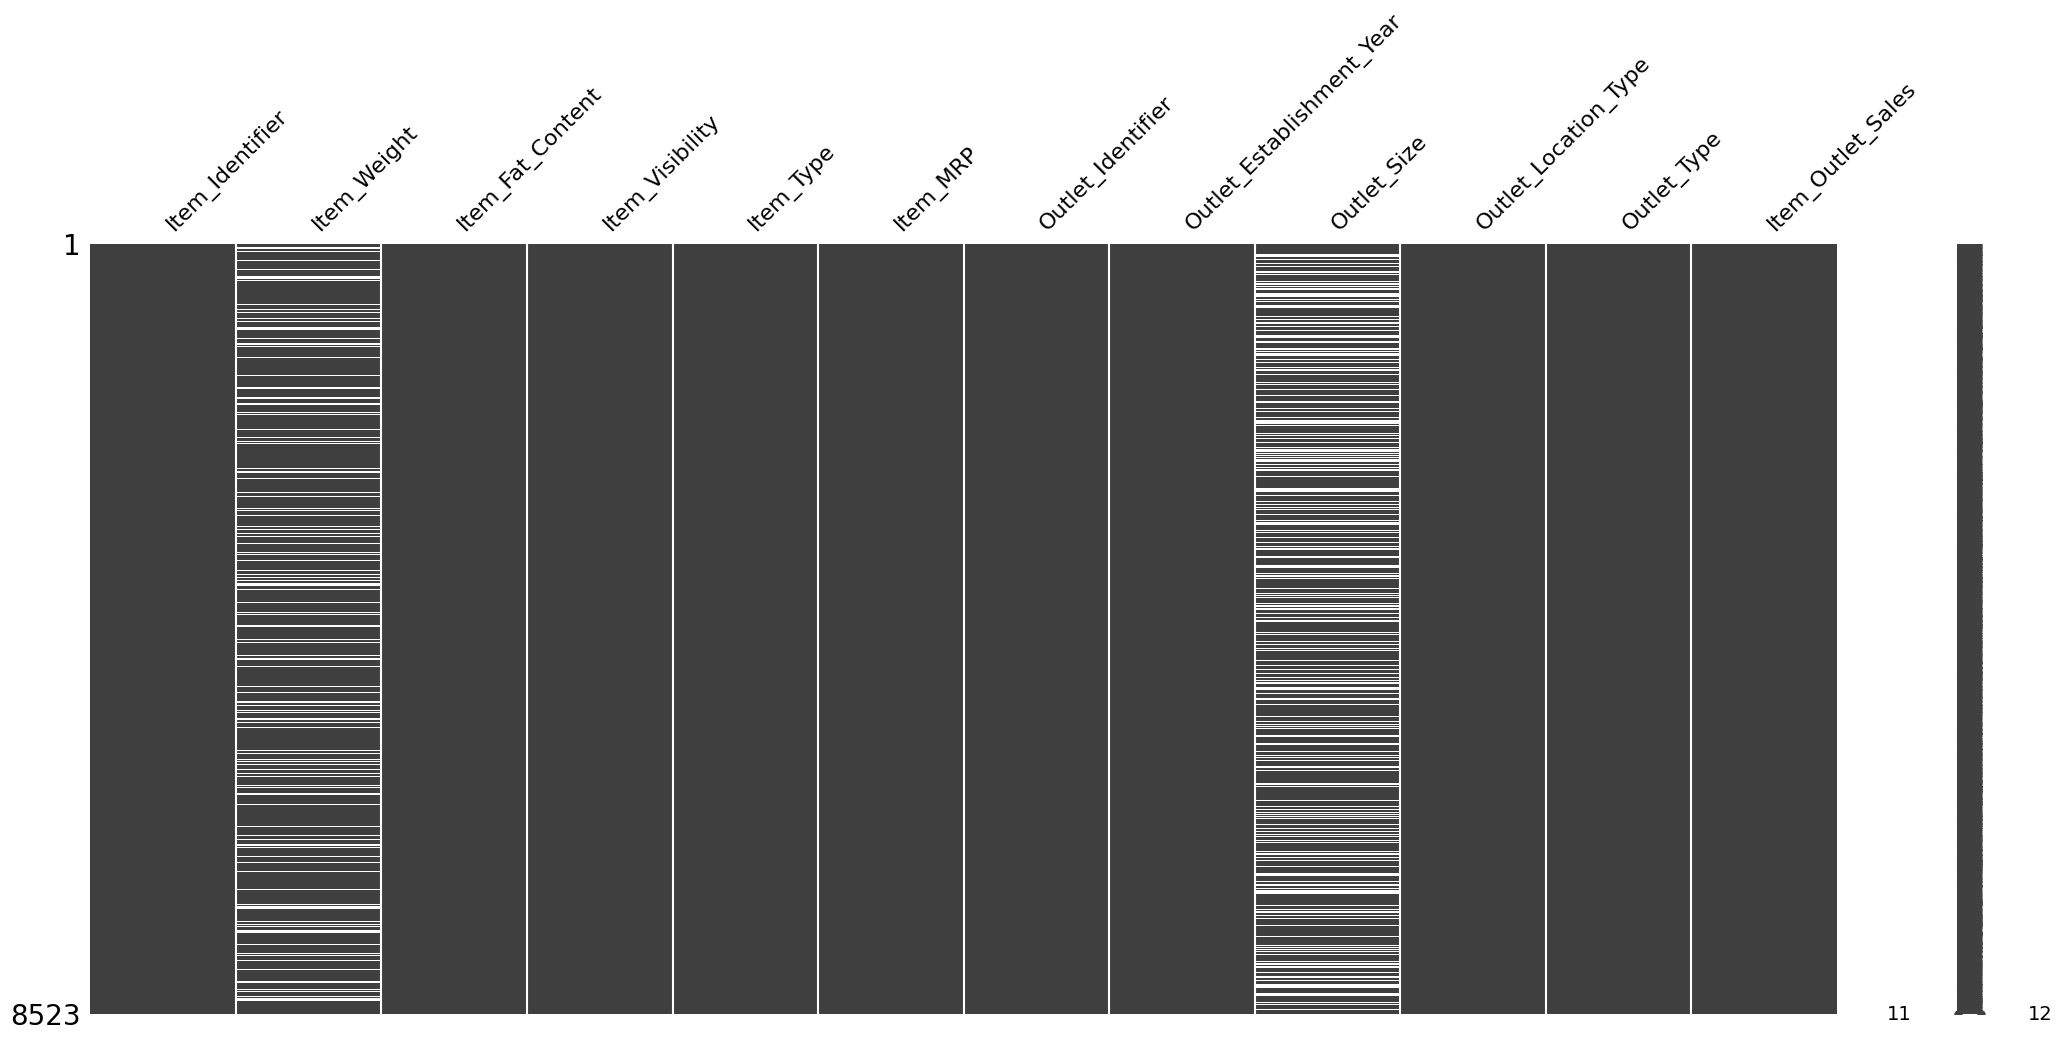

In [105]:
import missingno as msno
msno.matrix(df);

In [106]:
null_garage_type = df['Outlet_Size'].isna()
null_garage_type

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [107]:
# 4) Identify missing values.
df[null_garage_type]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [108]:
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [109]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [110]:
# df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

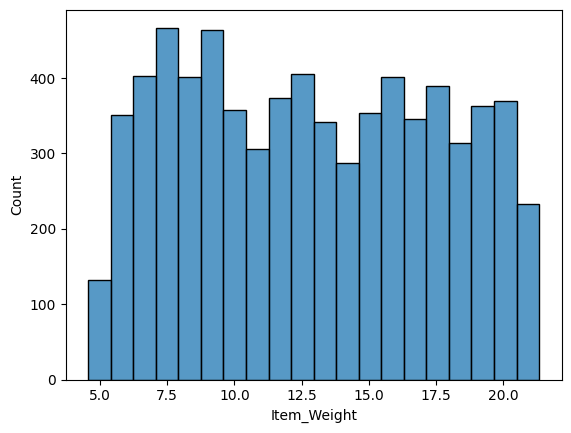

In [111]:
import seaborn as sns
ax = sns.histplot(data = df, x = 'Item_Weight')


In [112]:
dec_item_weight = df['Item_Weight'].describe()
round(dec_item_weight,2)

count    7060.00
mean       12.86
std         4.64
min         4.56
25%         8.77
50%        12.60
75%        16.85
max        21.35
Name: Item_Weight, dtype: float64

In [113]:
df['Item_Weight'].median()

12.6

In [114]:
# df['Item_Weight'] = df['Item_Weight'].fillna(12.86)
df['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [115]:
df['Item_Weight'].isna().sum()


1463

In [116]:
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [117]:
# Find and fix any inconsistent categories of data
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [118]:
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [119]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [120]:
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    9

In [121]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat':"low-fat",'LF':'low-fat','low fat':'low-fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

low-fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [122]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [123]:
for num in num_cols:
  print(f"describe for {num}")
  print(df[num].describe())
  print('\n\n')


describe for Item_Weight
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64



describe for Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64



describe for Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64



describe for Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64



describe for Item_Outlet_Sales
count     8523.0000

## Exploratory Visuals & Analysis

In [124]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low-fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low-fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low-fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low-fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low-fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [125]:
# we will plot the distribution and a boxplot of numeric feature
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [126]:
# df['Item_Identifier'].unique().sum()

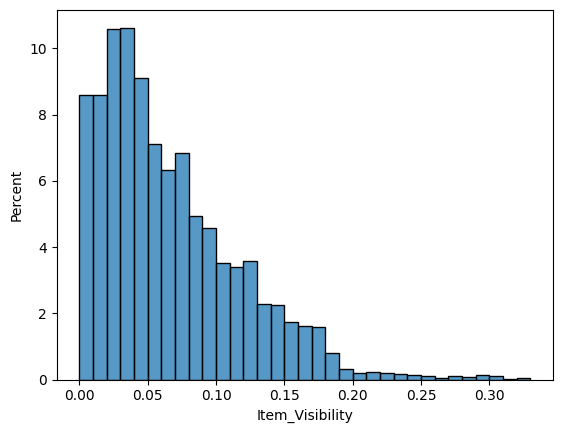

In [127]:
# Use histogram To show the visibility of products
ax = sns.histplot(data=df, x='Item_Visibility',binwidth=0.01, stat='percent')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x');

   - It can be seen that only a vary small amount of the displayed products have good visibility

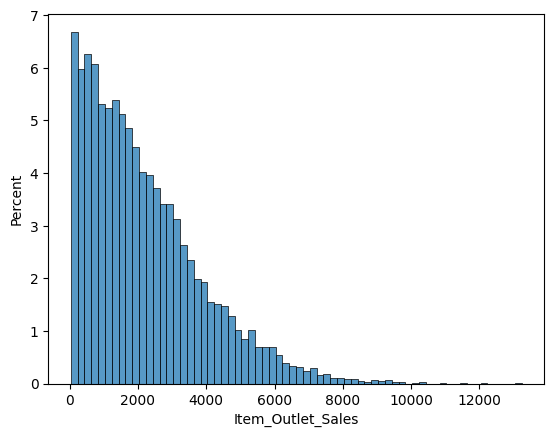

In [128]:


ax = sns.histplot(data=df, x='Item_Outlet_Sales',binwidth=200, stat='percent')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x');


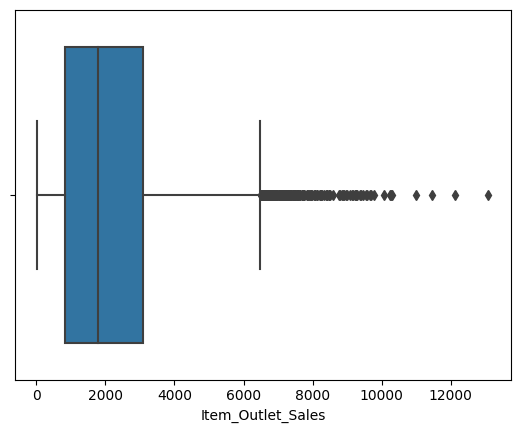

In [129]:
ax = sns.boxplot(data=df, x="Item_Outlet_Sales")

  **We see from the previous two figures that most products have a sales range of between 1000-3000**

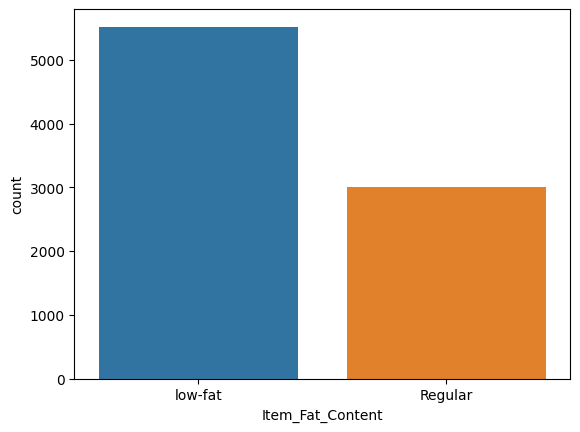

In [130]:
ax = sns.countplot(data=df, x="Item_Fat_Content")


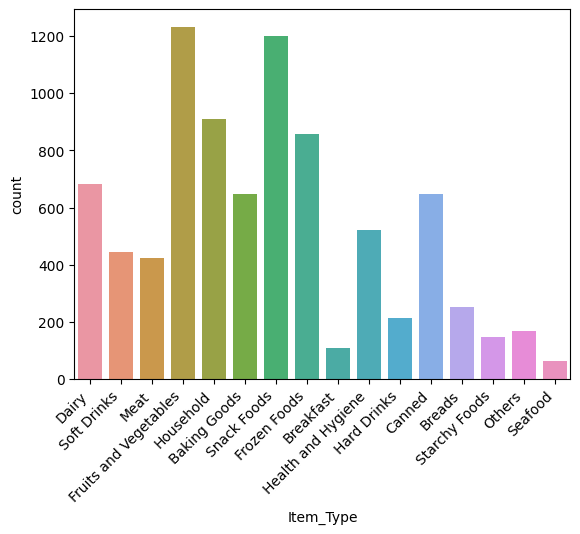

In [131]:
ax = sns.countplot(data=df, x="Item_Type",)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

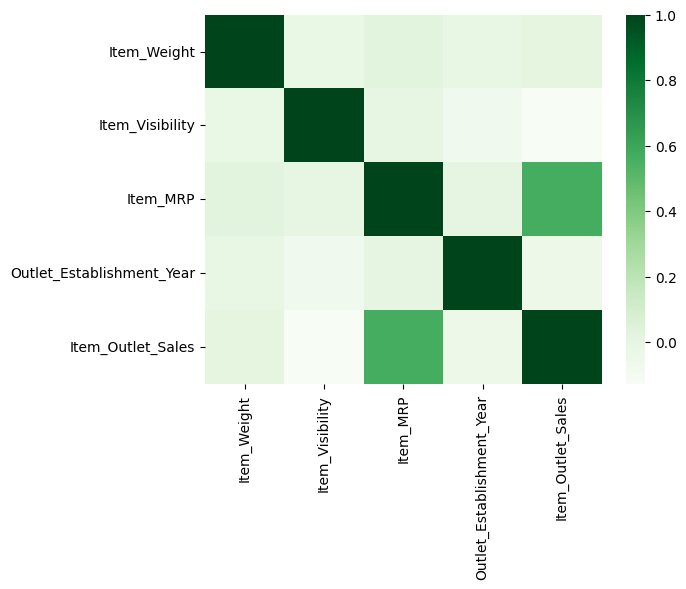

In [132]:
corr = df.corr(numeric_only = True)

sns.heatmap(corr, cmap = 'Greens');



- There is a strong direct relationship between the maximum price of the product and the outlet sales

# Project 1 - Part 4

## Explanatory Visuals & Analysis

- here we build several data visualizations to help better understand trends in the data

- We will build on our previous cleaning, exploration, and analysis.  


## EDA Functions

In [133]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [134]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

**0) Data Dictionary**
- Item_Weight : 	Weight of product


In [135]:
df['Item_Identifier'].value_counts().sum()

8523

**1) Univariate Viz**

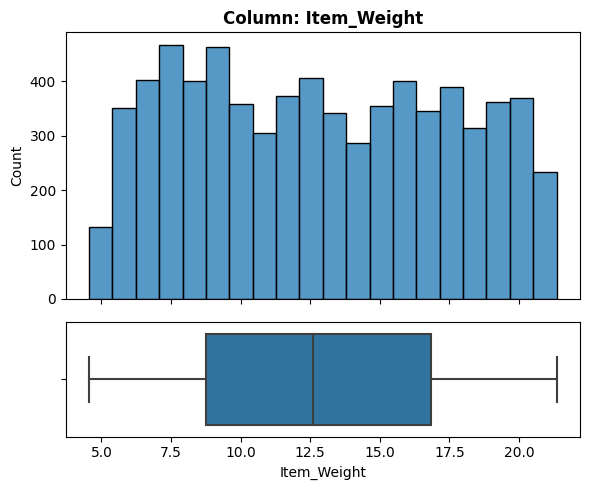

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [136]:
explore_numeric(df, 'Item_Weight');


**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 1463 (17.17%)
  - impute by mean
- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - (numeric feature).
- Would we know this feature before the target is determined?
  - no
- Is there a business case/understanding reason to exclude based on our business case?
 - The size of the product do not affect the sales of the product itself , I expect be a relationship if the weight of a product is compared with the product type (Item_Type).
   


**3) Multivariate Viz**



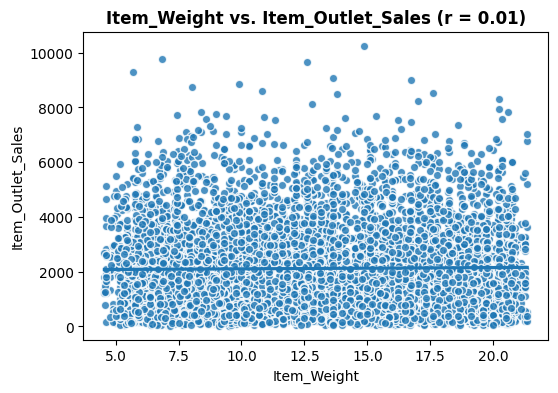

In [137]:
plot_numeric_vs_target(df, x='Item_Weight'
                           );

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - no
- Does this feature appear to be a predictor of the target?
    - No, there is a no correlation between the feature and the target (corr=0.01)

In [138]:
#################################################################

**0) Data Dictionary**
- Item_Fat_Content  :	Whether the product is low-fat or regular


**1) Univariate Viz**

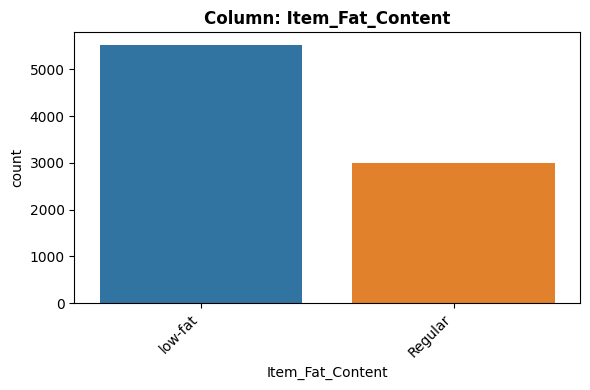

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low-fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [139]:
explore_categorical(df, x='Item_Fat_Content', fillna = True);

**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 (0.0%)

- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - 2 , not high
- Would we know this feature before the target is determined?
  - no
- Is there a business case/understanding reason to exclude based on our business case?
 -no
   


**3) Multivariate Viz**



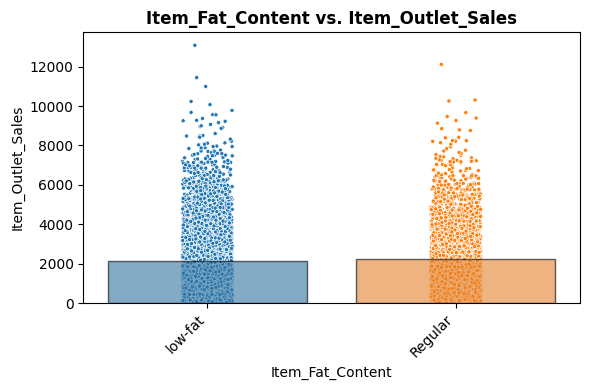

In [140]:
plot_categorical_vs_target(df, x='Item_Fat_Content');

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - no
- Does this feature appear to be a predictor of the target?
    - No, there is a no correlation between the feature and the target

In [141]:
##########################################


**0) Data Dictionary**
- Item_Visibility	: The percentage of total display area of all products in a store allocated to the particular product

**1) Univariate Viz**

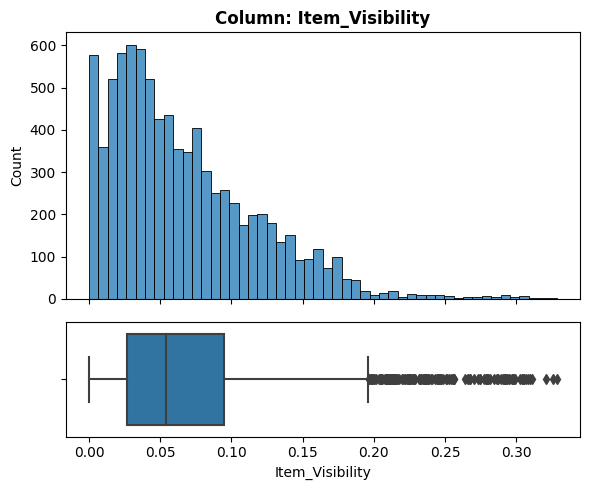

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [142]:
explore_numeric(df, 'Item_Visibility');


**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  -  0 (0.0%)
  
- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - (numeric feature).
- Would we know this feature before the target is determined?
  - no
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes, there may be a relationship between product visibility and sales
   


**3) Multivariate Viz**



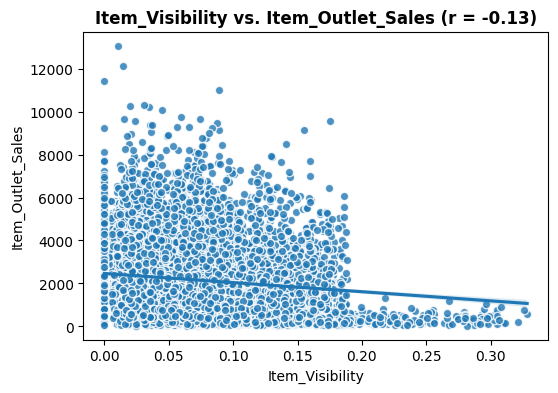

In [143]:
plot_numeric_vs_target(df, x='Item_Visibility'
                           );

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - yes
- Does this feature appear to be a predictor of the target?
    - Yes, but not if the Visibility range is divided

In [144]:
###########################33#######################


**0) Data Dictionary**
- Item_Type	 :  The category to which the product belongs

**1) Univariate Viz**

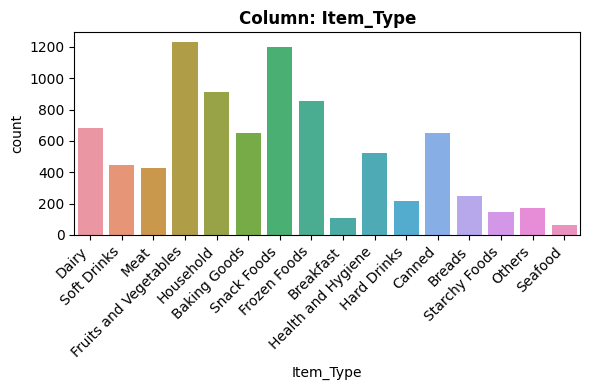

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [145]:
explore_categorical(df, x='Item_Type', fillna = True);

**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 (0.0%)

- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - 16 ,yes it is high
- Would we know this feature before the target is determined?
  - yes
- Is there a business case/understanding reason to exclude based on our business case?
 -no
   


**3) Multivariate Viz**



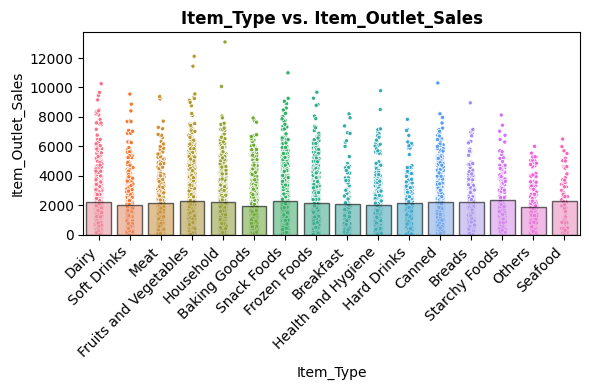

In [146]:
plot_categorical_vs_target(df, x='Item_Type');

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - yes
- Does this feature appear to be a predictor of the target?
    - yes, there is a slightly correlation between the feature and the target

In [147]:
###################################################

**0) Data Dictionary**
- Item_MRP :	Maximum Retail Price (list price) of the product

**1) Univariate Viz**

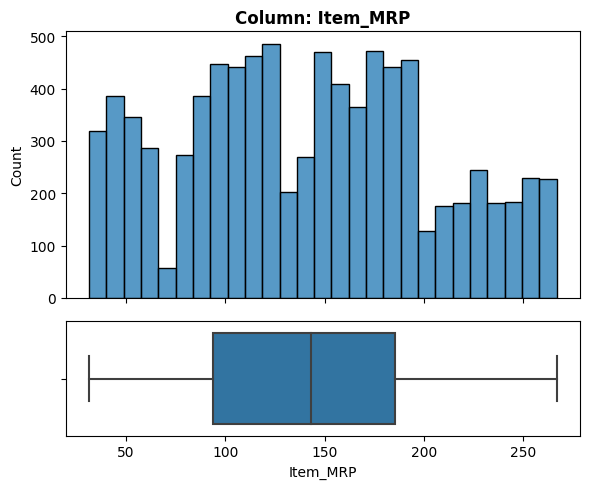

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [148]:
explore_numeric(df, 'Item_MRP');


**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  -  0 (0.0%)
  
- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - (numeric feature).
- Would we know this feature before the target is determined?
  - yes
- Is there a business case/understanding reason to exclude based on our business case?
 - no
   


**3) Multivariate Viz**



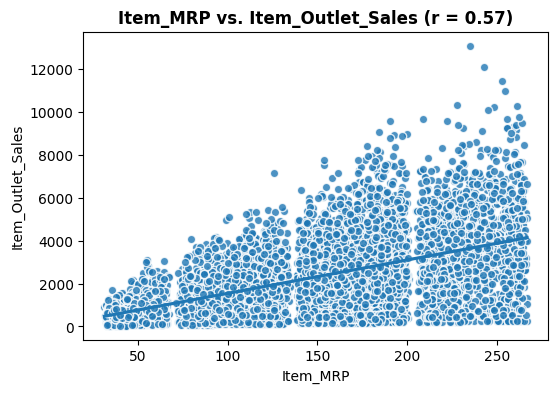

In [149]:
plot_numeric_vs_target(df, x='Item_MRP'
                           );

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - yes
- Does this feature appear to be a predictor of the target?
    - Yes,corr=0.57

In [150]:
###########################33#######################


**0) Data Dictionary**
- Outlet_Identifier	 : Store ID

**1) Univariate Viz**

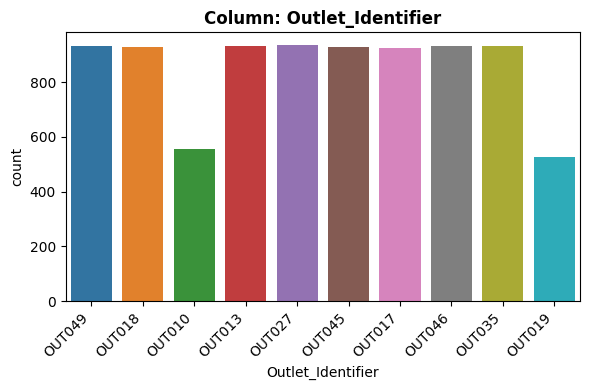

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [151]:
explore_categorical(df, x='Outlet_Identifier', fillna = True);

**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 (0.0%)

- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - 10 ,yes it is high
- Would we know this feature before the target is determined?
  - yes
- Is there a business case/understanding reason to exclude based on our business case?
 - no
   


**3) Multivariate Viz**



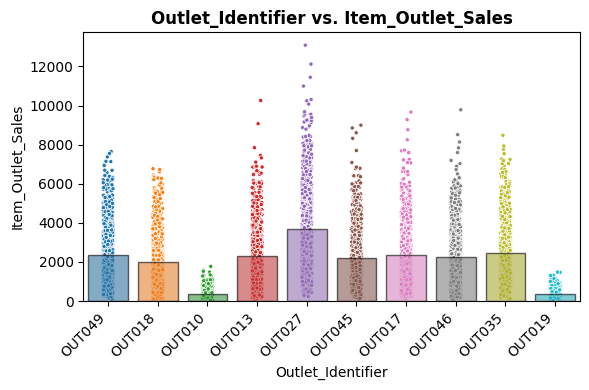

In [152]:
plot_categorical_vs_target(df, x='Outlet_Identifier');

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - yes
- Does this feature appear to be a predictor of the target?
    - yes, tYes, there are stores that sell more quantities than others

In [153]:
#######################################################################

**0) Data Dictionary**
- Outlet_Establishment_Year	 : The year in which store was established

**1) Univariate Viz**

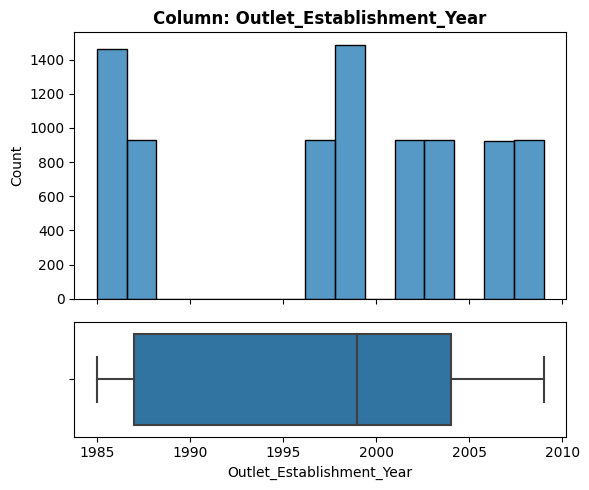

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [154]:
explore_numeric(df, 'Outlet_Establishment_Year');


**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  -  0 (0.0%)
  
- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - (numeric feature).
- Would we know this feature before the target is determined?
  - yes
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes, because there may be modern stores with large sales or old stores with small sales
   


**3) Multivariate Viz**



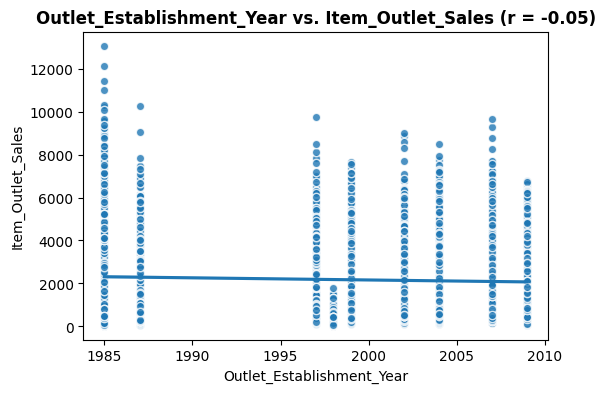

In [155]:
plot_numeric_vs_target(df, x='Outlet_Establishment_Year'
                           );

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - no
- Does this feature appear to be a predictor of the target?
    - no,corr= -0.05

In [156]:
##################################################


**0) Data Dictionary**
- Outlet_Size  :	The size of the store in terms of ground area covered

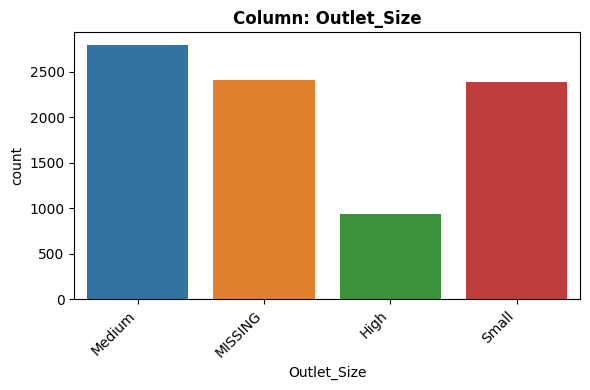

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [157]:
explore_categorical(df, x='Outlet_Size', fillna = True);

**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 2410 (28.28%)
  - we can ask steakholder about the size it jast tow Outlet

- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - 4 , no
- Would we know this feature before the target is determined?
  - yes
- Is there a business case/understanding reason to exclude based on our business case?
 - no
   


**3) Multivariate Viz**



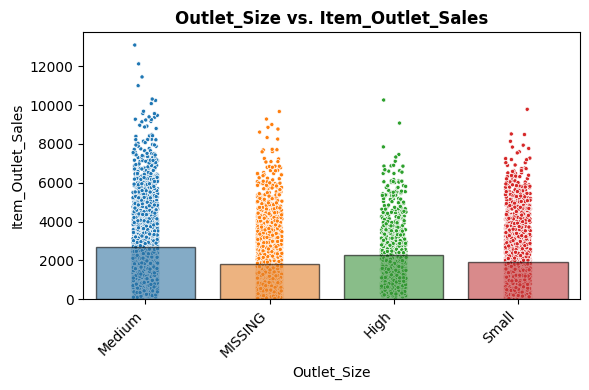

In [158]:
plot_categorical_vs_target(df, x='Outlet_Size');

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - yes
- Does this feature appear to be a predictor of the target?
    - yes

In [159]:
########################################


**0) Data Dictionary**
- Outlet_Location_Type  :	The type of area in which the store is located

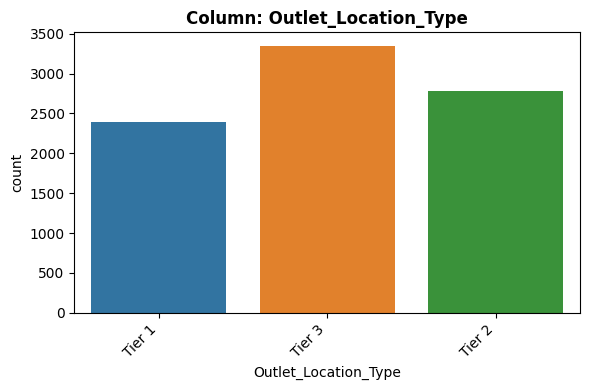

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [160]:
explore_categorical(df, x='Outlet_Location_Type', fillna = True);

**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 (0.0%)

- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - 3 , no
- Would we know this feature before the target is determined?
  - yes
- Is there a business case/understanding reason to exclude based on our business case?
 - no
   


**3) Multivariate Viz**



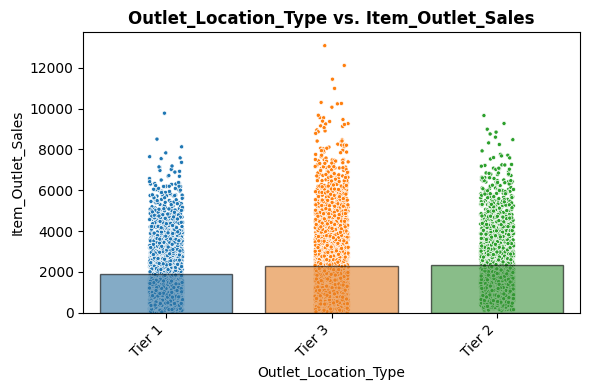

In [161]:
plot_categorical_vs_target(df, x='Outlet_Location_Type');

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - yes
- Does this feature appear to be a predictor of the target?
    - yes

In [162]:
#############################################

**0) Data Dictionary**
Outlet_Type	 :  Whether the outlet is a grocery store or some sort of supermarket

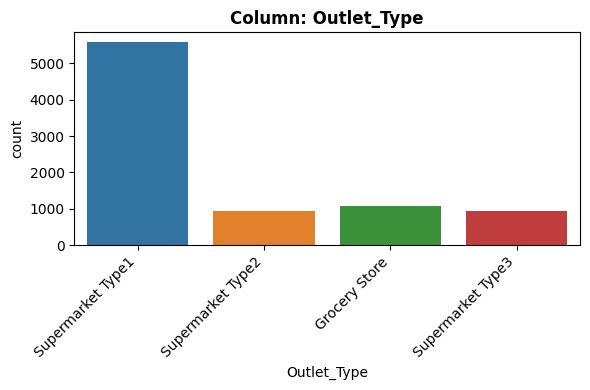

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [163]:
explore_categorical(df, x='Outlet_Type', fillna = True);

**2) Feature Observations**
- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 (0.0%)

- Is the feature constant or quasi-constant?
   - Not constant or quasi-constant.
- What is the cardinality? Is it high (>10)?
  - 4 , no
- Would we know this feature before the target is determined?
  - yes
- Is there a business case/understanding reason to exclude based on our business case?
 - no
   


**3) Multivariate Viz**



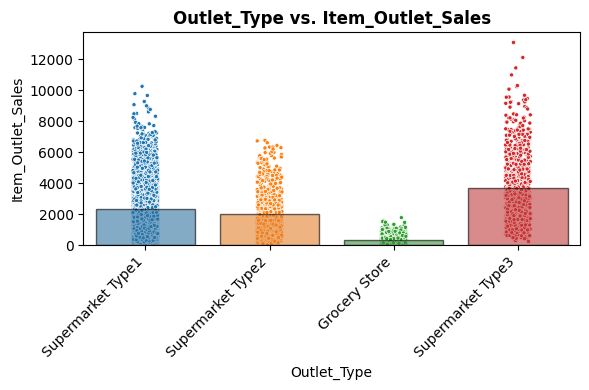

In [164]:
plot_categorical_vs_target(df, x='Outlet_Type');

**4) Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
   - yes
- Does this feature appear to be a predictor of the target?
    - yes

# Project 1 - Part 5

## Preprocesing for Machine Learning

In [165]:
path = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [166]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")

In [167]:
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [168]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat':"low-fat",'LF':'low-fat','low fat':'low-fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

low-fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [169]:
X = df.drop(columns = ["Item_Outlet_Sales","Item_Identifier"] )
y = df["Item_Outlet_Sales"]

In [170]:
from sklearn.model_selection import train_test_split
#  X = Features     , y = target
X_train,X_test,y_trian,y_test = train_test_split(X,y,random_state=32)

In [171]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [172]:
### Numeric Pipeline

# Save list of column names
num_cols = X_train.select_dtypes("number").columns
# instantiate preprocessors
impute_median = SimpleImputer(strategy='mean')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)

# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple



('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [181]:
### Ordinal Pipeline

# Save list of column names
ord_cols = ['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type']
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order1 = ['MISSING','Small', 'Medium', 'High']
qual_cond_order2= ['low-fat','Regular']
qual_cond_order3 = ['Tier 1','Tier 2', 'Tier 3']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order2, qual_cond_order1,qual_cond_order3]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
# Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)

# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)



In [182]:
### Categorical Pipeline

# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)

# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

### Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)



In [183]:
### Fit on training data
col_transformer.fit(X_train)

### Transform Training and Test data
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)